In [1]:
#Load the libraries
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#read the files
train = pd.read_csv('train_loan_data.csv')
test = pd.read_csv('test_loan_data.csv')
result = pd.read_csv('test_results.csv')

In [3]:
train.shape, test.shape, result.shape

((80000, 28), (20000, 27), (20000, 1))

In [4]:
train.info(), test.info(), result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  float64
 6   fico_range_low        80000 non-null  float64
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  float64
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

(None, None, None)

In [5]:
display(train.head(2), test.head(2),result.head(2))

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid


,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified


,loan_status
0,Fully Paid
1,Fully Paid


## EDA and Preprocessing

In [6]:
train.duplicated().sum(), test.duplicated().sum()

(0, 0)

In [7]:
data = pd.concat([train,test])
data.shape

(100000, 28)

In [8]:
data.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [9]:
data.head(2)

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338.0,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,0.0,debt_consolidation,19944.0,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   addr_state            100000 non-null  object 
 1   annual_inc            100000 non-null  float64
 2   earliest_cr_line      100000 non-null  object 
 3   emp_length            94154 non-null   object 
 4   emp_title             93604 non-null   object 
 5   fico_range_high       100000 non-null  float64
 6   fico_range_low        100000 non-null  float64
 7   grade                 100000 non-null  object 
 8   home_ownership        100000 non-null  object 
 9   application_type      100000 non-null  object 
 10  initial_list_status   100000 non-null  object 
 11  int_rate              100000 non-null  float64
 12  loan_amnt             100000 non-null  float64
 13  num_actv_bc_tl        95041 non-null   float64
 14  mort_acc              96525 non-null   float64
 15  t

In [11]:
data.drop_duplicates(inplace = True)

In [12]:
data.isna().sum()

addr_state                  0
annual_inc                  0
earliest_cr_line            0
emp_length               5846
emp_title                6396
fico_range_high             0
fico_range_low              0
grade                       0
home_ownership              0
application_type            0
initial_list_status         0
int_rate                    0
loan_amnt                   0
num_actv_bc_tl           4959
mort_acc                 3475
tot_cur_bal              4959
open_acc                    0
pub_rec                     0
pub_rec_bankruptcies       42
purpose                     0
revol_bal                   0
revol_util                 66
sub_grade                   0
term                        0
title                    1217
total_acc                   0
verification_status         0
loan_status             20000
dtype: int64

In [13]:
data['addr_state'].unique() #no feature can be extracted

array(['CO', 'CA', 'FL', 'IL', 'MD', 'NY', 'PA', 'WI', 'UT', 'TX', 'AL',
       'KS', 'AR', 'AZ', 'MI', 'MN', 'LA', 'HI', 'NC', 'VT', 'OK', 'KY',
       'ME', 'CT', 'AK', 'NJ', 'IN', 'GA', 'MA', 'OR', 'NM', 'VA', 'TN',
       'SC', 'NV', 'WY', 'WA', 'WV', 'MO', 'OH', 'MS', 'DC', 'NE', 'ID',
       'NH', 'RI', 'SD', 'MT', 'DE', 'ND', 'IA'], dtype=object)

In [14]:
#extract year and month
data['year'] = pd.DatetimeIndex(data['earliest_cr_line']).year
data['month'] = pd.DatetimeIndex(data['earliest_cr_line']).month

In [15]:
data['emp_length'].unique()

array(['10+ years', nan, '3 years', '< 1 year', '1 year', '8 years',
       '7 years', '4 years', '2 years', '5 years', '6 years', '9 years'],
      dtype=object)

In [16]:
data.dropna(subset = 'emp_length', inplace = True)

In [17]:
#replacing so that we get only specific employment length
data['employment_years'] = data['emp_length'].replace({'< 1 year':'Entry level','1 year':'Entry level','2 years':'Entry level','3 years':'Entry level','4 years':'Mid-senior level','5 years':'Mid-senior level','6 years':'Mid-senior level','7 years':'Mid-senior level','8 years':'Mid-senior level','9 years':'Director level','10+ years':'Director level'})

In [18]:
data['emp_title'].unique()

array(['Deputy', 'Department of Veterans Affairs', 'Marble polishing',
       ..., 'lighting coordinator', 'Contract & Compliance Manager',
       'rv technician'], dtype=object)

In [19]:
data['emp_title'] = data['emp_title'].fillna(data['emp_title'].mode()[0])

In [20]:
data['grade'].unique()

array(['E', 'B', 'F', 'C', 'D', 'A', 'G'], dtype=object)

In [21]:
data['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [22]:
data['home_ownership'].value_counts()

MORTGAGE    46813
RENT        37699
OWN          9611
ANY            21
OTHER           6
NONE            4
Name: home_ownership, dtype: int64

In [23]:
data = data.drop(data[data['home_ownership'] == 'NONE'].index) #removing undefined 

In [24]:
data['home_ownership'].replace({'ANY':'OTHER'},inplace = True)

In [25]:
data['application_type'].unique()

array(['Individual', 'Joint App'], dtype=object)

In [26]:
data['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [27]:
data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'other', 'home_improvement',
       'small_business', 'medical', 'major_purchase', 'car', 'vacation',
       'house', 'moving', 'wedding', 'renewable_energy', 'educational'],
      dtype=object)

In [28]:
data['sub_grade'].unique()

array(['E1', 'B1', 'B5', 'B2', 'F5', 'C1', 'C4', 'D4', 'B4', 'A5', 'C3',
       'C2', 'E4', 'F3', 'E2', 'A1', 'C5', 'B3', 'E5', 'A4', 'D2', 'F2',
       'A2', 'A3', 'D3', 'F1', 'D5', 'D1', 'E3', 'G2', 'F4', 'G1', 'G3',
       'G4', 'G5'], dtype=object)

In [29]:
data['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

In [30]:
data['title'].unique()

array(['Debt consolidation', 'Credit Loan', 'Debt Connsolidation', ...,
       'Car Refinance', 'Consolidation Home Improvement', 'Repurpose'],
      dtype=object)

In [31]:
data['title'] = data['title'].fillna(data['title'].mode()[0])

In [32]:
data['verification_status'].unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [33]:
data['loan_status'].unique()

array(['Charged Off', 'Fully Paid', nan], dtype=object)

In [34]:
data.head(2)

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status,year,month,employment_years
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off,1997,7,Director level
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid,1987,4,Director level


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94148 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            94148 non-null  object 
 1   annual_inc            94148 non-null  float64
 2   earliest_cr_line      94148 non-null  object 
 3   emp_length            94148 non-null  object 
 4   emp_title             94148 non-null  object 
 5   fico_range_high       94148 non-null  float64
 6   fico_range_low        94148 non-null  float64
 7   grade                 94148 non-null  object 
 8   home_ownership        94148 non-null  object 
 9   application_type      94148 non-null  object 
 10  initial_list_status   94148 non-null  object 
 11  int_rate              94148 non-null  float64
 12  loan_amnt             94148 non-null  float64
 13  num_actv_bc_tl        89345 non-null  float64
 14  mort_acc              90779 non-null  float64
 15  tot_cur_bal        

In [36]:
data.select_dtypes(include=object).columns

Index(['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'purpose',
       'sub_grade', 'term', 'title', 'verification_status', 'loan_status',
       'employment_years'],
      dtype='object')

In [38]:
selected_columns = ['addr_state','employment_years','emp_title','grade','home_ownership','application_type','initial_list_status','purpose','sub_grade','term','verification_status','employment_years']
cat_cols = data[selected_columns].copy()

In [39]:
cat_cols

,addr_state,employment_years,emp_title,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,verification_status,employment_years
0,CO,Director level,Deputy,E,MORTGAGE,Individual,w,debt_consolidation,E1,60 months,Source Verified,Director level
1,CA,Director level,Department of Veterans Affairs,B,RENT,Individual,w,debt_consolidation,B1,36 months,Verified,Director level
2,FL,Director level,Marble polishing,B,MORTGAGE,Individual,w,debt_consolidation,B5,36 months,Source Verified,Director level
3,IL,Director level,printer,B,MORTGAGE,Individual,w,debt_consolidation,B2,36 months,Source Verified,Director level
4,MD,Director level,Southern Mgmt,F,RENT,Individual,f,debt_consolidation,F5,60 months,Verified,Director level
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MO,Mid-senior level,lighting coordinator,D,RENT,Individual,w,debt_consolidation,D4,36 months,Not Verified,Mid-senior level
19996,VA,Entry level,Contract & Compliance Manager,D,MORTGAGE,Individual,f,debt_consolidation,D4,60 months,Source Verified,Entry level
19997,TX,Director level,Pharmacist,B,MORTGAGE,Individual,f,debt_consolidation,B5,36 months,Source Verified,Director level
19998,FL,Director level,Manager In Training,A,MORTGAGE,Individual,w,car,A5,36 months,Not Verified,Director level


# Outliers for numerical datatypes and resolving them

In [40]:
#to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])
    

annual_inc
Outliers =  19       852000.0
25       221000.0
57       225000.0
129      160000.0
141      190000.0
           ...   
19904    180000.0
19915    230000.0
19943    170000.0
19975    214000.0
19978    286000.0
Name: annual_inc, Length: 4771, dtype: float64
fico_range_high
Outliers =  66       789.0
99       784.0
136      779.0
152      799.0
202      779.0
         ...  
19773    794.0
19789    784.0
19850    809.0
19904    799.0
19998    809.0
Name: fico_range_high, Length: 3065, dtype: float64
fico_range_low
Outliers =  66       785.0
99       780.0
136      775.0
152      795.0
202      775.0
         ...  
19773    790.0
19789    780.0
19850    805.0
19904    795.0
19998    805.0
Name: fico_range_low, Length: 3065, dtype: float64
int_rate
Outliers =  65       30.74
106      29.99
150      26.24
211      26.30
223      28.14
         ...  
19577    26.30
19602    27.34
19684    28.34
19690    25.57
19752    30.17
Name: int_rate, Length: 1733, dtype: float64
loan_amnt
Out

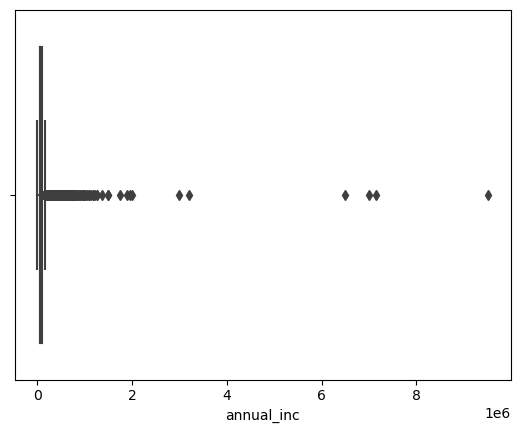

In [41]:
sns.boxplot(x=data['annual_inc'])
plt.show()

In [42]:
data[['annual_inc']].describe()

,annual_inc
count,9.414800e+04
mean,7.780448e+04
std,7.415663e+04
min,0.000000e+00
25%,4.800000e+04
50%,6.500000e+04
75%,9.200000e+04
max,9.522972e+06


In [43]:
data = data[~(data['annual_inc']<0)] #income cannot be negative

In [44]:
data['annual_inc'].quantile(0.25)

48000.0

In [45]:
data['annual_inc'].quantile(0.75)

92000.0

In [46]:
Q1 = data['annual_inc'].quantile(0.25)
Q3 = data['annual_inc'].quantile(0.75)
IQR = Q3-Q1
IQR

44000.0

In [47]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [48]:
lower_lim

-18000.0

In [49]:
upper_lim

158000.0

In [50]:
outliers_low = (data['annual_inc']<lower_lim)

In [51]:
outliers_up = (data['annual_inc']>upper_lim)

In [52]:
data['annual_inc'][~(outliers_low | outliers_up)]

0         85000.0
1         40000.0
2         60000.0
3        100742.0
4         80000.0
           ...   
19995     38500.0
19996     80000.0
19997     95000.0
19998     35000.0
19999     30700.0
Name: annual_inc, Length: 89377, dtype: float64

In [53]:
data = data[~(outliers_low | outliers_up)]

In [54]:
data

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status,year,month,employment_years
0,CO,85000.0,Jul-1997,10+ years,Deputy,744.0,740.0,E,MORTGAGE,Individual,...,93.6,E1,60 months,Debt consolidation,8.0,Source Verified,Charged Off,1997,7,Director level
1,CA,40000.0,Apr-1987,10+ years,Department of Veterans Affairs,724.0,720.0,B,RENT,Individual,...,60.3,B1,36 months,Credit Loan,12.0,Verified,Fully Paid,1987,4,Director level
2,FL,60000.0,Aug-2007,10+ years,Marble polishing,679.0,675.0,B,MORTGAGE,Individual,...,88.5,B5,36 months,Debt consolidation,16.0,Source Verified,Fully Paid,2007,8,Director level
3,IL,100742.0,Sep-1980,10+ years,printer,664.0,660.0,B,MORTGAGE,Individual,...,69.0,B2,36 months,Debt consolidation,19.0,Source Verified,Fully Paid,1980,9,Director level
4,MD,80000.0,Jul-1999,10+ years,Southern Mgmt,669.0,665.0,F,RENT,Individual,...,90.0,F5,60 months,Debt Connsolidation,59.0,Verified,Fully Paid,1999,7,Director level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MO,38500.0,Sep-2010,4 years,lighting coordinator,679.0,675.0,D,RENT,Individual,...,60.0,D4,36 months,Debt consolidation,10.0,Not Verified,NaN,2010,9,Mid-senior level
19996,VA,80000.0,Dec-1998,3 years,Contract & Compliance Manager,674.0,670.0,D,MORTGAGE,Individual,...,75.1,D4,60 months,Debt consolidation,30.0,Source Verified,NaN,1998,12,Entry level
19997,TX,95000.0,May-1996,10+ years,Pharmacist,729.0,725.0,B,MORTGAGE,Individual,...,60.7,B5,36 months,Debt consolidation,29.0,Source Verified,NaN,1996,5,Director level
19998,FL,35000.0,Mar-2003,10+ years,Manager In Training,809.0,805.0,A,MORTGAGE,Individual,...,4.4,A5,36 months,Car financing,19.0,Not Verified,NaN,2003,3,Director level


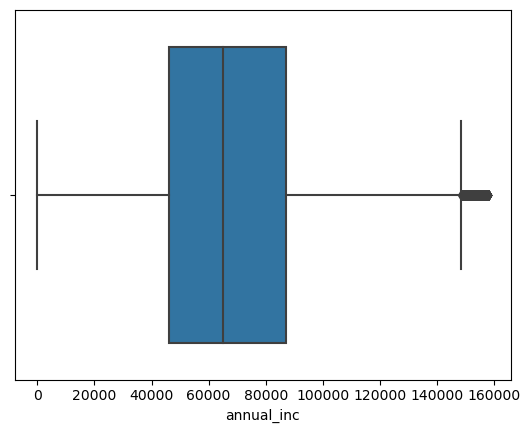

In [55]:
sns.boxplot(x=data['annual_inc'])
plt.show()

In [56]:
#Still got few outliers so replace the remaining with median
median = data.loc[data['annual_inc']<140000,'annual_inc'].median()
data['annual_inc'] = np.where(data['annual_inc']>140000,median,data['annual_inc'])

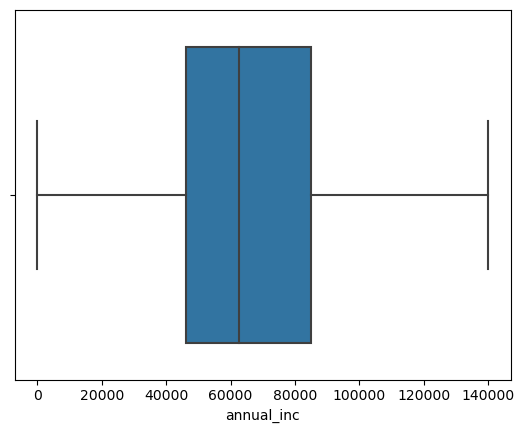

In [57]:
sns.boxplot(x=data['annual_inc'])
plt.show()

### Outliers of Annual Income has been removed with two methos, 1. Dropping the outliers method, 2. replace with median

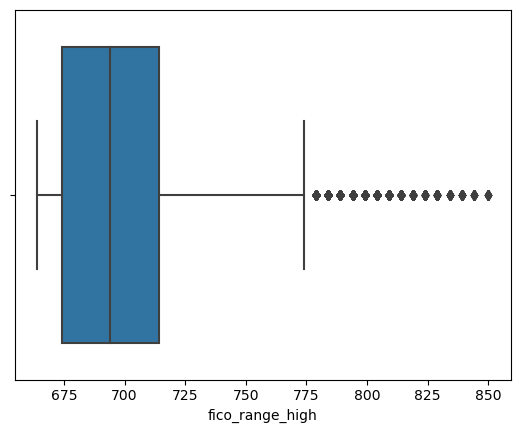

In [58]:
sns.boxplot(x=data['fico_range_high'])
plt.show()

In [59]:
#removing fico range high outlier
data = data[~(data['fico_range_high']>775)]

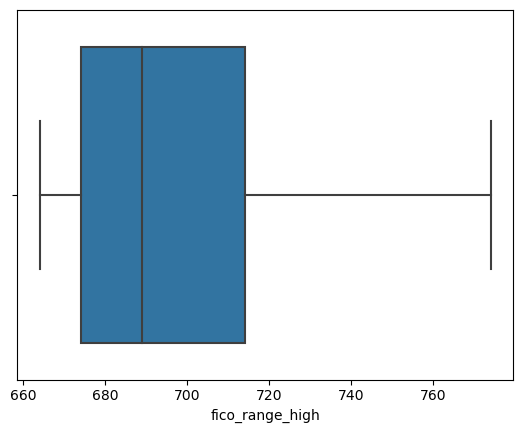

In [60]:
sns.boxplot(x=data['fico_range_high'])
plt.show()

In [61]:
data.shape

(86566, 31)

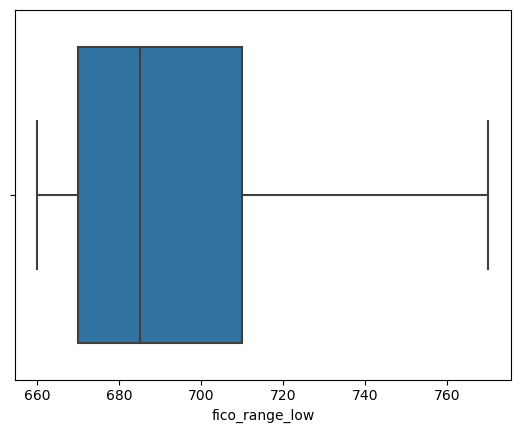

In [62]:
#no outliers
sns.boxplot(x=data['fico_range_low'])
plt.show()

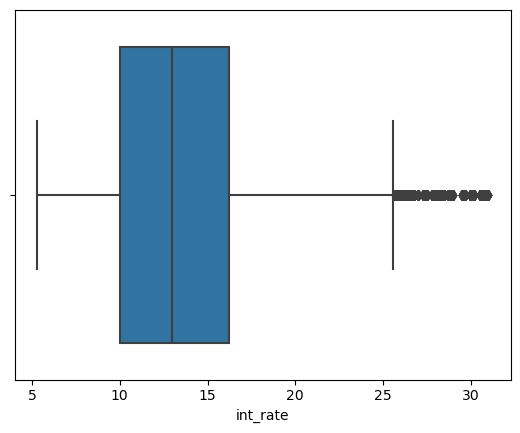

In [63]:
sns.boxplot(x=data['int_rate'])
plt.show()

In [64]:
#removing interest rate outlier
data = data[~(data['int_rate']>25)]

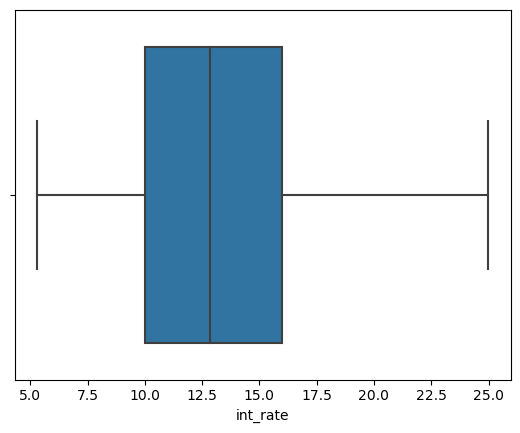

In [65]:
sns.boxplot(x=data['int_rate'])
plt.show()

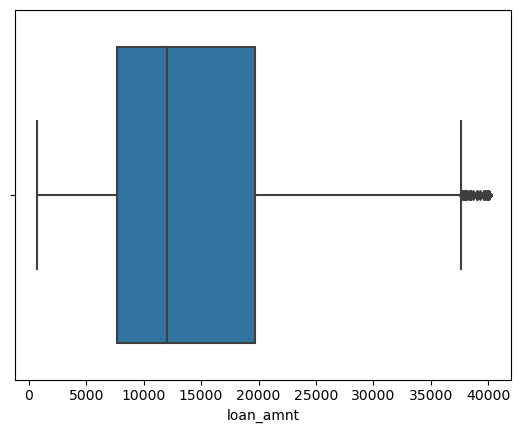

In [66]:
sns.boxplot(x=data['loan_amnt'])
plt.show()

In [67]:
#removing outlier with median
median = data.loc[data['loan_amnt']<35000,'loan_amnt'].median()
data['loan_amnt'] = np.where(data['loan_amnt']>35000,median,data['loan_amnt'])

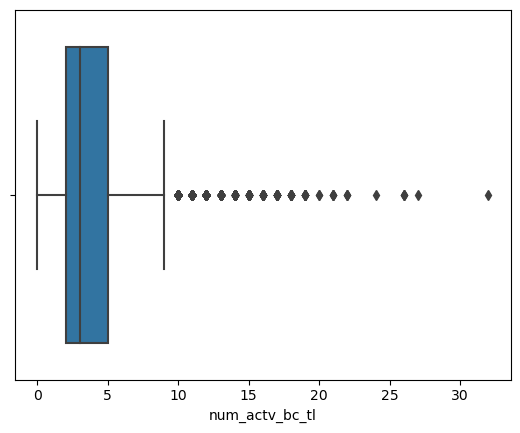

In [68]:
sns.boxplot(x=data['num_actv_bc_tl'])
plt.show()

In [69]:
data['num_actv_bc_tl'].value_counts()

3.0     17345
2.0     16686
4.0     13497
5.0      9143
1.0      8951
6.0      5525
7.0      3118
8.0      1855
0.0      1609
9.0      1098
10.0      666
11.0      406
12.0      217
13.0      141
14.0       75
15.0       49
16.0       28
17.0       23
18.0       16
19.0       10
21.0        4
22.0        3
26.0        3
20.0        2
24.0        1
27.0        1
32.0        1
Name: num_actv_bc_tl, dtype: int64

In [70]:
#removing outlier with median
median = data.loc[data['num_actv_bc_tl']<10,'num_actv_bc_tl'].median()
data['num_actv_bc_tl'] = np.where(data['num_actv_bc_tl']>10,median,data['loan_amnt'])

In [71]:
data.isna().sum()

addr_state                  0
annual_inc                  0
earliest_cr_line            0
emp_length                  0
emp_title                   0
fico_range_high             0
fico_range_low              0
grade                       0
home_ownership              0
application_type            0
initial_list_status         0
int_rate                    0
loan_amnt                   0
num_actv_bc_tl              0
mort_acc                 3036
tot_cur_bal              4349
open_acc                    0
pub_rec                     0
pub_rec_bankruptcies       35
purpose                     0
revol_bal                   0
revol_util                 46
sub_grade                   0
term                        0
title                       0
total_acc                   0
verification_status         0
loan_status             16881
year                        0
month                       0
employment_years            0
dtype: int64

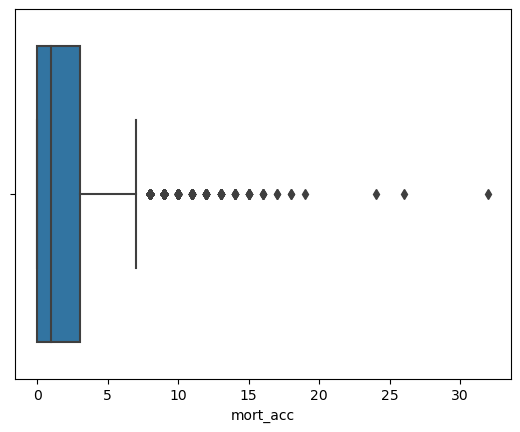

In [72]:
sns.boxplot(x=data['mort_acc'])
plt.show()

In [73]:
data.dropna(subset = 'mort_acc', inplace = True)